In [2]:
# %% 

import geopandas as gpd
import numpy as np
import pandas as pd
import itertools
import pyomo.environ as pyo
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import contextily as ctx
import importlib

import parameters_dynamic2
from parameters_dynamic2 import *

# Change scenario dynamically
scenario_name = "baseline2"  # New scenario
parameters_dynamic2.scenario_name = scenario_name  # Update it in the session

importlib.reload(parameters_dynamic2)  # Reload the module to apply changes

# Display parameters for the new scenario
print(parameters_dynamic2.params)

from CUAMM_Opt import *

# from parameters_dynamic2 import dps, hfs, hps, hcs, services, health_workers, levels, HFs_to_locate, distance_matrix, workers_to_allocate, lb_workers, a_HF, a_W, t1max, service_time, working_hours
# from parameters_dynamic2 import demand_points_gdf, hfs_gdf, hcs_gdf, hps_gdf
# from parameters_dynamic2 import total_population, dr_oh, dr_ch, dd_oh, dd_ch #new Feb 19
# from parameters_dynamic2 import camps, camp_demand_labels, camp_candidate_location_labels, t2max # new March 3

# from CUAMM_Opt import I, J, J_HP, J_HC, C, I_c, J_c, t, S, P, L, n_HF, n_W, Pi, r1, r2, d1, d2, lb, q, h
# from CUAMM_Opt import model_mshlam_mar25_CAMPS, model_mshlam_mar25_taumax_j
# from CUAMM_Opt import plot_solution, plot_solution_with_map, plot_solution_with_map_zoom
# from CUAMM_Opt import display_selected_variables
# from CUAMM_Opt import generate_facility_summary

{'location_file': 'location_refcamps2.geojson', 'distance_matrix': 'distance_matrix_refcamps_meters.xlsx', 'HFs_to_locate': [6, 8], 't1max': 1000, 't2max': 4500, 'workers_to_allocate': [6, 20, 20], 'total_population': 16045, 'demand_rate_opening_hours': [0.00835, 0.00162, 0.0001], 'demand_rate_closing_hours': [0.03478, 0.00175, 0.00069], 'working_hours': [7, 8, 8], 'service_time': [0.5, 1, 2], 'lb_workers': [[0, 1], [1, 2], [1, 2]], 'ub_workers': [[6, 20], [6, 20], [6, 20]], 'services_at_HFs': [[1, 0], [1, 1], [0, 1]], 'services_per_worker': [[1, 0, 1], [1, 1, 0], [0, 1, 1]]}


In [3]:
model_CAMPS = model_mshlam_mar25_CAMPS("satisfied_demand",I, J, J_HP, J_HC, C, I_c, J_c, S, P, L, n_HF, Pi, r1, r2, d1, d2, t, n_W, lb, ub, a_HF, a_W, t1max, t2max, q, h)

solver = pyo.SolverFactory('cplex')
solver.options['timelimit'] = 120
results = solver.solve(model_CAMPS, tee=True)
print(results)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 22.1.1.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2022.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\laura\AppData\Local\Temp\tmpqfdrq40c.cplex.log' open.
CPLEX> New value for time limit in seconds: 120
CPLEX> Problem 'C:\Users\laura\AppData\Local\Temp\tmpynkwrg3s.pyomo.lp' read.
Read time = 0.03 sec. (0.35 ticks)
CPLEX> Problem name         : C:\Users\laura\AppData\Local\Temp\tmpynkwrg3s.pyomo.lp
Objective sense      : Maximize
Variables            :    1737  [Nneg: 7,  Binary: 440,  General Integer: 1290]
Objective nonzeros   :       1
Linear constraints   :    4071  [Less: 3353,  Equal: 718]
  Nonzeros           :   14327
  RHS nonzeros       :     288

Variables            : Min 

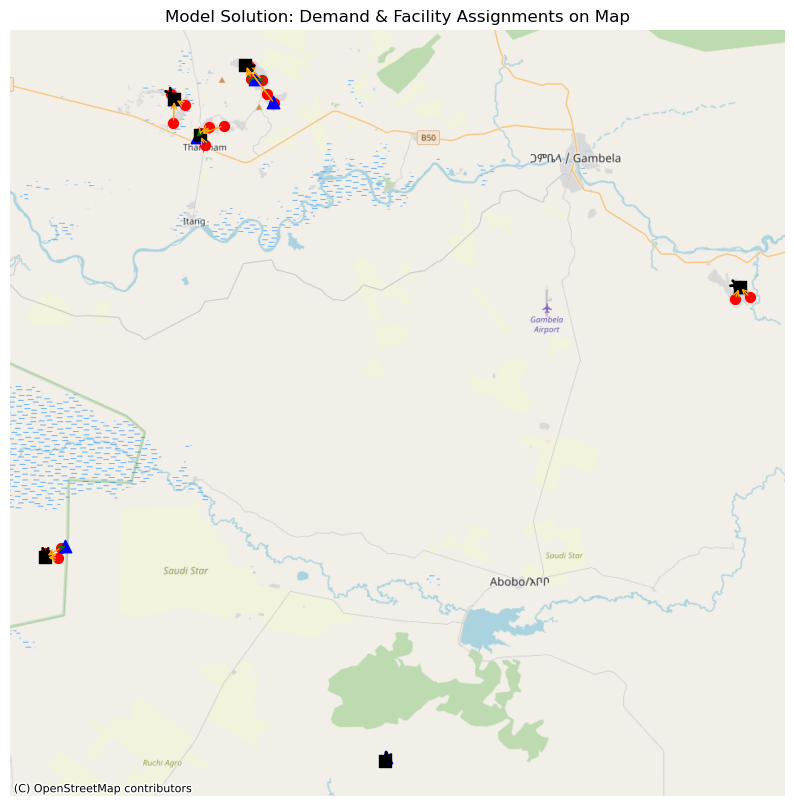

In [4]:
plot_solution_with_map(model_CAMPS, demand_points_gdf, hfs_gdf)


In [8]:
display_selected_variables(model_CAMPS, camps_model = True)

Selected variables (y_jl = 1, x1_ij = 1, x2_ij = 1, f1_ijs > 0, f2_ijs > 0, w_jp > 0, taumax > 0, deltamax > 0):
y[j1,hc] = 1.0
y[j3,hc] = 1.0
y[j4,hp] = 1.0
y[j5,hc] = 1.0
y[j6,hp] = 1.0
y[j7,hc] = 1.0
y[j9,hc] = 1.0
y[j10,hp] = 1.0
y[j11,hc] = 1.0
x1[i1,j1] = 1.0
x1[i3,j3] = 1.0
x1[i4,j4] = 1.0
x1[i7,j5] = 1.0
x1[i9,j6] = 1.0
x1[i15,j9] = 1.0
x1[i17,j10] = 1.0
x1[i18,j10] = 1.0
x1[i19,j11] = 1.0
x2[i1,j1] = 1.0 Demand Location is in camp 
x2[i2,j3] = 1.0 Demand Location is in camp 
x2[i3,j3] = 1.0 Demand Location is in camp 
x2[i4,j3] = 1.0 Demand Location is in camp 
x2[i5,j5] = 1.0 Demand Location is in camp 
x2[i6,j5] = 1.0 Demand Location is in camp 
x2[i7,j5] = 1.0 Demand Location is in camp 
x2[i8,j7] = 1.0 Demand Location is in camp 
x2[i9,j7] = 1.0 Demand Location is in camp 
x2[i10,j7] = 1.0 Demand Location is in camp 
x2[i11,j7] = 1.0 Demand Location is in camp 
x2[i12,j9] = 1.0 Demand Location is in camp 
x2[i13,j9] = 1.0 Demand Location is in camp 
x2[i14,j11] = 1.0 Deman

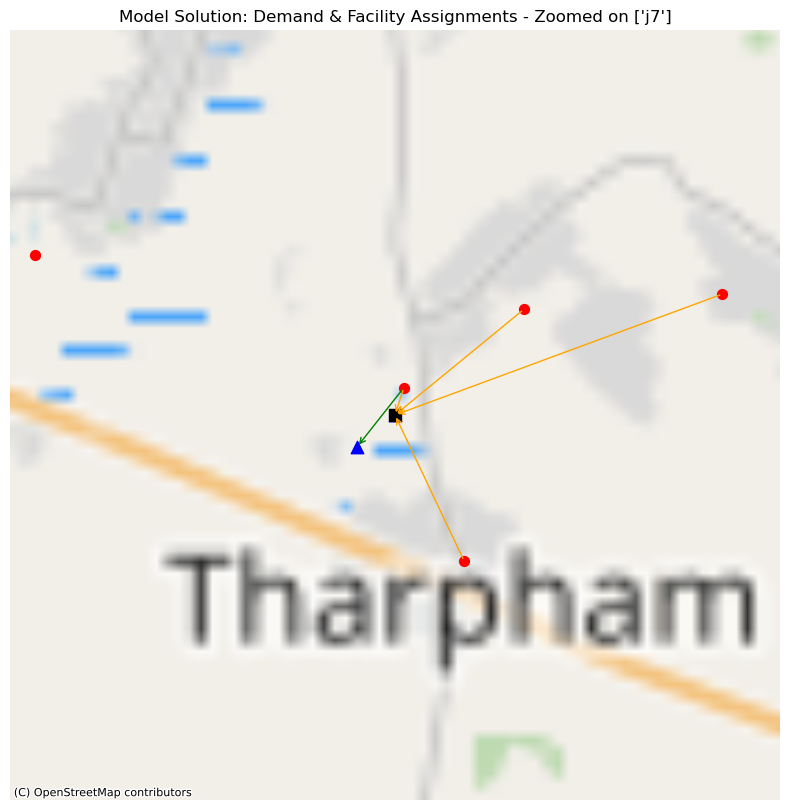

In [5]:
plot_solution_with_map_zoom(model_CAMPS, demand_points_gdf, hfs_gdf,  buffer_size = 2200, zoom_factor = 0.1, open_facility_label=['j7'])


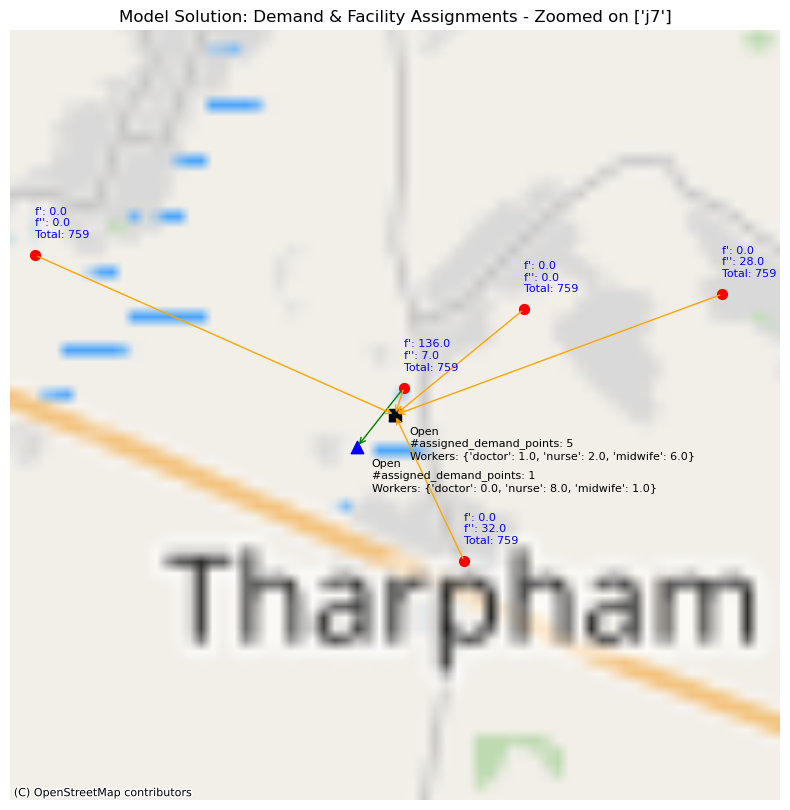

In [7]:
plot_solution_with_map_zoom(model_tauj_general, demand_points_gdf, hfs_gdf,  buffer_size = 2200, zoom_factor = 0.1, open_facility_label=['j7'])


In [6]:
generate_facility_summary(model_CAMPS, d1, q, services)

Summary table with uncovered percentage saved as 'facility_summary_with_uncovered_percentage.html'.


,Facility ID,Facility Type,#Assigned Demand Points,Satisfied Demand (f1; f2),Total Demand (d1; d2),Efficiency (%),Utilization (Service/Personnel),Max Distance,Demand - Basic (Capacity),Demand - Maternal1 (Capacity),Demand - Maternal2 (Capacity),Personnel - Doctor,Personnel - Nurse,Personnel - Midwife
0,j1,hc,1,4; 31,162; 597,4.6%,97.4%,171.66,0; 0 (46),4; 28 (32),0; 3 (11),1,2,2
1,j3,hc,3,4; 31,162; 1791,1.8%,97.4%,1737.40,0; 0 (46),4; 28 (32),0; 3 (11),1,2,2
2,j4,hp,1,24; 0,162; 0,14.8%,100.0%,390.88,16; 0 (16),8; 0 (16),0; 0 (4),0,1,1
3,j5,hc,3,26; 9,162; 1791,1.8%,97.4%,1364.48,0; 0 (46),26; 6 (32),0; 3 (11),1,2,2
4,j6,hp,1,40; 0,162; 0,24.7%,100.0%,516.74,16; 0 (16),24; 0 (32),0; 0 (12),0,1,3
5,j7,hc,4,0; 35,0; 2388,1.5%,97.4%,2393.00,0; 0 (46),0; 32 (32),0; 3 (11),1,2,2
6,j9,hc,3,28; 7,162; 1791,1.8%,97.4%,2214.72,0; 0 (46),26; 6 (32),2; 1 (11),1,2,2
7,j10,hp,2,128; 0,324; 0,39.5%,100.0%,713.09,96; 0 (96),32; 0 (80),0; 0 (16),0,6,4
8,j11,hc,5,28; 7,162; 2985,1.1%,97.4%,4472.64,0; 0 (46),26; 6 (32),2; 1 (11),1,2,2


In [8]:
generate_facility_summary(model_tauj_general, d1, q, services)

Summary table with uncovered percentage saved as 'facility_summary_with_uncovered_percentage.html'.


,Facility ID,Facility Type,"Satisfied Demand (f1, f2)","Total Demand (d1, d2)",Efficiency (%),Utilization (Service/Personnel),Max Distance,Demand - Basic (Capacity),Demand - Maternal1 (Capacity),Demand - Maternal2 (Capacity),Personnel - Doctor,Personnel - Nurse,Personnel - Midwife
0,j1,hc,"4, 31","162, 597",4.6%,97.4%,171.66,"0.0, 0.0 (46)","4.0, 28.0 (32)","0.0, 3.0 (11)",1,2,2
1,j3,hc,"4, 31","162, 1791",1.8%,97.4%,1737.40,"0.0, 0.0 (46)","4.0, 28.0 (32)","0.0, 3.0 (11)",1,2,2
2,j5,hc,"28, 7","162, 1791",1.8%,97.4%,1364.48,"0.0, 0.0 (46)","26.0, 6.0 (32)","2.0, 1.0 (11)",1,2,2
3,j6,hp,"136, 0","162, 0",84.0%,100.0%,516.74,"128.0, 0.0 (128)","8.0, 0.0 (72)","0.0, 0.0 (4)",0,8,1
4,j7,hc,"0, 67","0, 2985",2.2%,100.0%,2701.79,"0.0, 0.0 (46)","0.0, 63.0 (64)","0.0, 4.0 (27)",1,2,6
5,j9,hc,"0, 35","0, 1194",2.9%,97.4%,1130.42,"0.0, 0.0 (46)","0.0, 32.0 (32)","0.0, 3.0 (11)",1,2,2
6,j11,hc,"0, 59","0, 2985",2.0%,100.0%,4472.64,"0.0, 0.0 (46)","0.0, 55.0 (56)","0.0, 4.0 (23)",1,2,5


___________________________________________________________________________________________________________________________________________________________________________

<mark>At this point I am changing the scenario from 'baseline2' to 'tierkidi'. I need to restart the kernel and run the following</mark>

{'location_file': 'tierkidi.geojson', 'distance_matrix': 'distance_matrix_tierkidi.xlsx', 'HFs_to_locate': [2, 1], 't1max': 1000, 't2max': 3500, 'workers_to_allocate': [1, 14, 14], 'total_population': 700, 'demand_rate_opening_hours': [0.00835, 0.00162, 0.0001], 'demand_rate_closing_hours': [0.03478, 0.00175, 0.00069], 'working_hours': [7, 8, 8], 'service_time': [0.5, 1, 2], 'lb_workers': [[0, 1], [1, 2], [1, 2]], 'services_at_HFs': [[1, 0], [1, 1], [0, 1]], 'services_per_worker': [[1, 0, 1], [1, 1, 0], [0, 1, 1]]}
700

Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 22.1.1.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2022.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\laura\AppData\Local\Temp\tmpk_64826m.cplex.log' open.
CPLEX> New v

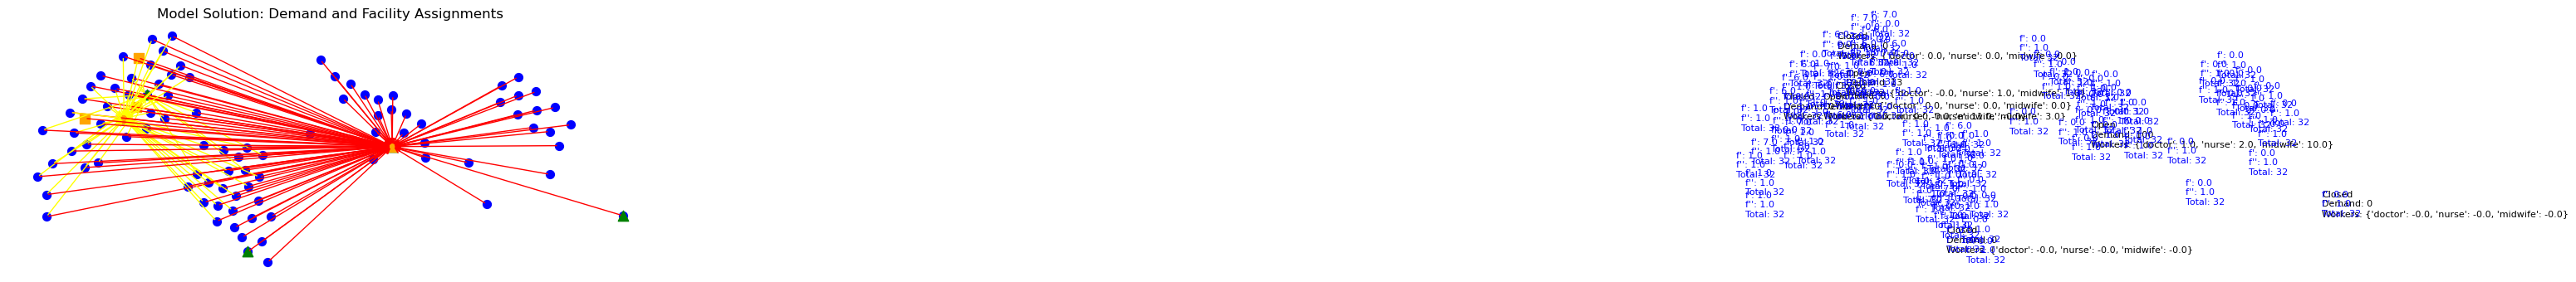

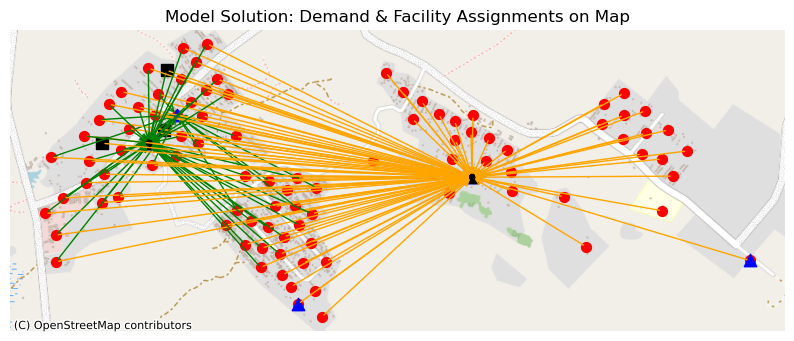

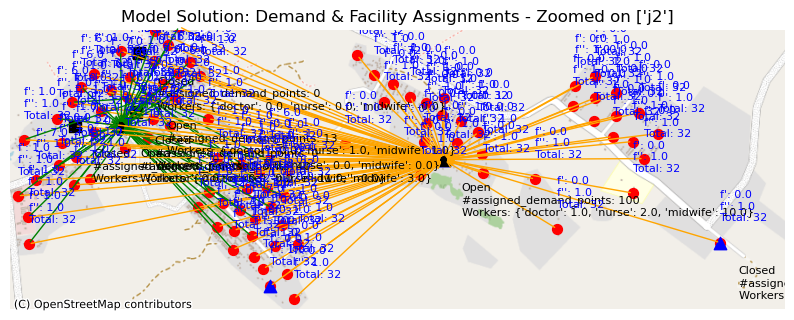

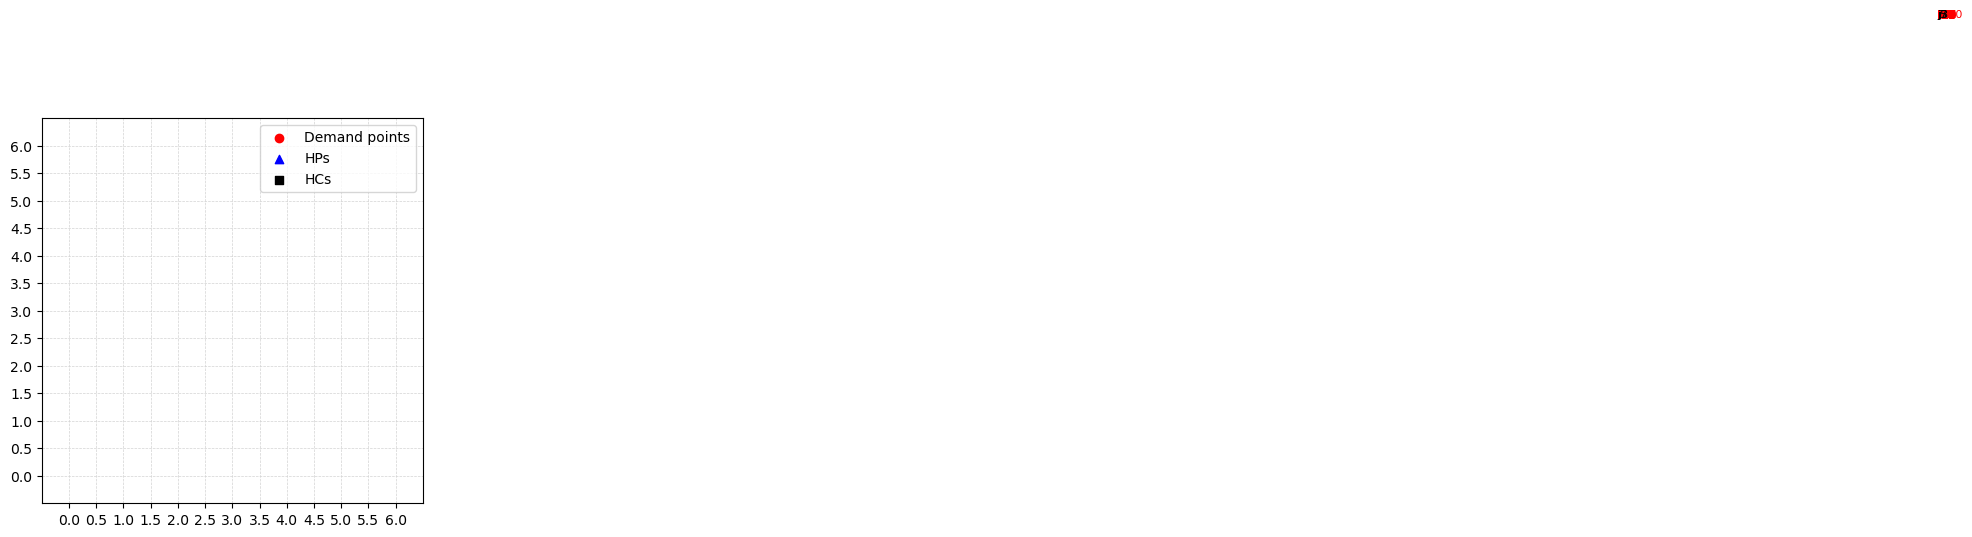

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import itertools
import pyomo.environ as pyo
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import contextily as ctx
import importlib

import parameters_dynamic2
from parameters_dynamic2 import *

# Change scenario dynamically
scenario_name = "terkidi_baseline"  # New scenario
parameters_dynamic2.scenario_name = scenario_name  # Update it in the session

importlib.reload(parameters_dynamic2)  # Reload the module to apply changes

# Display parameters for the new scenario
print(parameters_dynamic2.params)

from CUAMM_Opt import *

In [2]:
model_tauj = model_mshlam_mar25_taumax_j(I, J, J_HP, J_HC, S, P, L, n_HF, Pi, r1, r2, d1, d2, t, n_W, lb, a_HF, a_W, t1max, t2max, q, h)

solver = pyo.SolverFactory('cplex')
solver.options['timelimit'] = 120
results = solver.solve(model_tauj, tee=True)
print(results)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 22.1.1.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2022.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\laura\AppData\Local\Temp\tmpw_oco90j.cplex.log' open.
CPLEX> New value for time limit in seconds: 120
CPLEX> Problem 'C:\Users\laura\AppData\Local\Temp\tmp2swanzag.pyomo.lp' read.
Read time = 0.08 sec. (1.34 ticks)
CPLEX> Problem name         : C:\Users\laura\AppData\Local\Temp\tmp2swanzag.pyomo.lp
Objective sense      : Maximize
Variables            :    6452  [Nneg: 9,  Binary: 1616,  General Integer: 4827]
Objective nonzeros   :       3
Linear constraints   :   13218  [Less: 13109,  Equal: 109]
  Nonzeros           :   49082
  RHS nonzeros       :    1121

Variables            : Mi

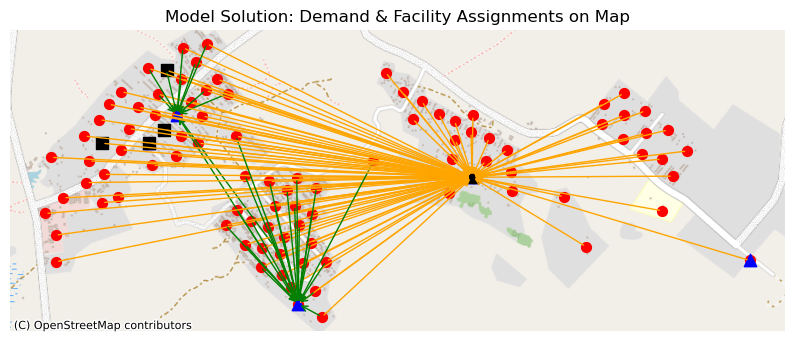

In [3]:
plot_solution_with_map(model_tauj, demand_points_gdf, hfs_gdf)


In [6]:
display_selected_variables(model_tauj, camps_model = False)

Selected variables (y_jl = 1, x1_ij = 1, x2_ij = 1, f1_ijs > 0, f2_ijs > 0, w_jp > 0, taumax > 0, deltamax > 0):
y[j1,hp] = 1.0
y[j3,hc] = 1.0
y[j7,hp] = 1.0
x1[i1,j1] = 1.0
x1[i2,j1] = 1.0
x1[i3,j1] = 1.0
x1[i4,j1] = 1.0
x1[i5,j1] = 1.0
x1[i6,j1] = 1.0
x1[i7,j1] = 1.0
x1[i9,j1] = 1.0
x1[i11,j7] = 1.0
x1[i12,j7] = 1.0
x1[i14,j1] = 1.0
x1[i15,j1] = 1.0
x1[i16,j1] = 1.0
x1[i18,j1] = 1.0
x1[i19,j1] = 1.0
x1[i20,j1] = 1.0
x1[i21,j1] = 1.0
x1[i22,j1] = 1.0
x1[i25,j1] = 1.0
x1[i26,j1] = 1.0
x1[i27,j1] = 1.0
x1[i34,j1] = 1.0
x1[i35,j1] = 1.0
x1[i37,j1] = 1.0
x1[i38,j1] = 1.0
x1[i41,j1] = 1.0
x1[i46,j1] = 1.0
x1[i64,j1] = 1.0
x1[i78,j7] = 1.0
x1[i87,j7] = 1.0
x1[i88,j7] = 1.0
x1[i92,j7] = 1.0
x1[i94,j7] = 1.0
x1[i96,j7] = 1.0
x1[i97,j7] = 1.0
x1[i98,j7] = 1.0
x1[i99,j7] = 1.0
x1[i100,j7] = 1.0
x2[i1,j3] = 1.0 Demand Location is in camp 
x2[i2,j3] = 1.0 Demand Location is in camp 
x2[i3,j3] = 1.0 Demand Location is in camp 
x2[i4,j3] = 1.0 Demand Location is in camp 
x2[i5,j3] = 1.0 Demand Loca

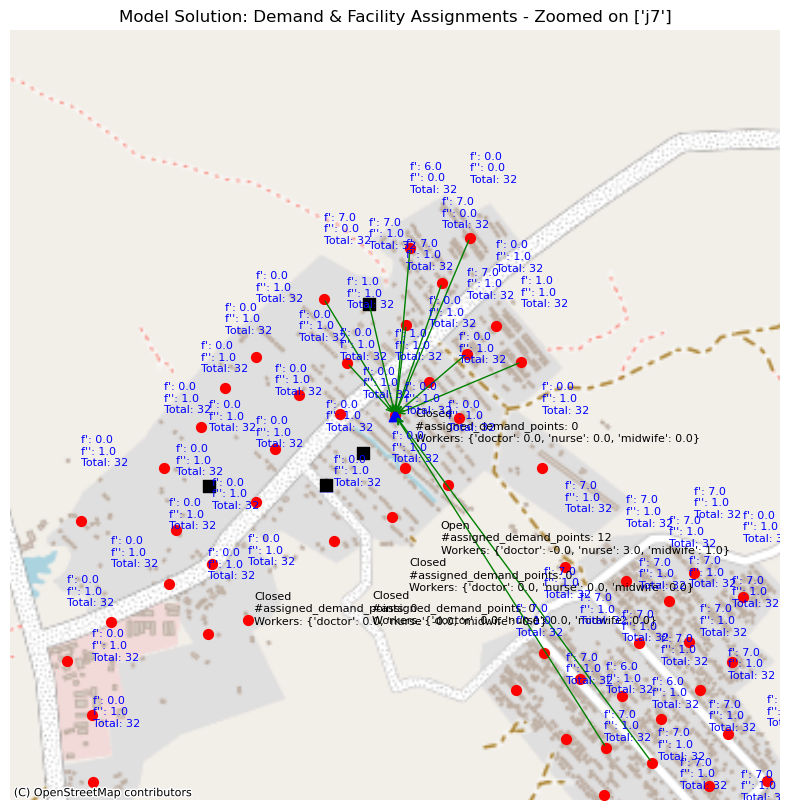

In [6]:
plot_solution_with_map_zoom(model_tauj, demand_points_gdf, hfs_gdf,  buffer_size = 700, zoom_factor = 0.1, open_facility_label=['j7'])


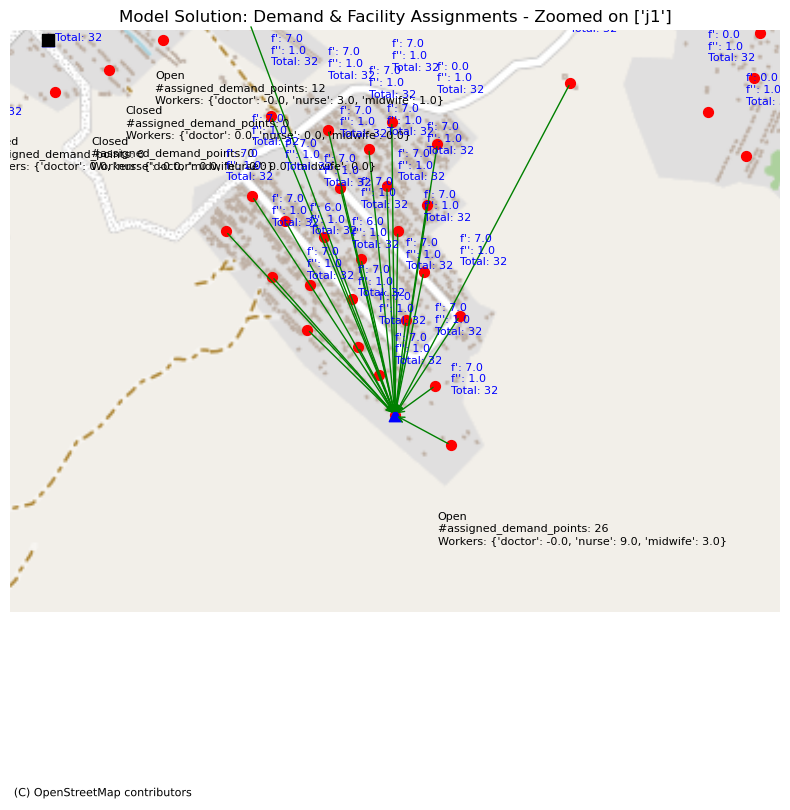

In [7]:
plot_solution_with_map_zoom(model_tauj, demand_points_gdf, hfs_gdf,  buffer_size = 750, zoom_factor = 0.1, open_facility_label=['j1'])


In [3]:
sum(d1)

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [5]:
generate_facility_summary(model_tauj, d1, q, services)

Summary table with uncovered percentage saved as 'facility_summary_with_uncovered_percentage.html'.


,Facility ID,Facility Type,"Satisfied Demand (f1, f2)","Total Demand (d1, d2)",Efficiency (%),Utilization (Service/Personnel),Max Distance,Demand - Basic (Capacity),Demand - Maternal1 (Capacity),Demand - Maternal2 (Capacity),Personnel - Doctor,Personnel - Nurse,Personnel - Midwife
0,j1,hp,"168, 0","182, 0",92.3%,100.0%,974.33,"144.0, 0.0 (144)","24.0, 0.0 (96)","0.0, 0.0 (12)",0,9,3
1,j3,hc,"0, 96","0, 2500",3.8%,93.2%,2332.11,"0.0, 0.0 (46)","0.0, 96.0 (96)","0.0, 0.0 (43)",1,2,10
2,j7,hp,"56, 0","84, 0",66.7%,100.0%,942.99,"48.0, 0.0 (48)","8.0, 0.0 (32)","0.0, 0.0 (4)",0,3,1
